In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_raw = pd.read_csv("kc_house_data.csv")

In [ ]:
data = data_raw.copy()

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data.shape

(21613, 21)

In [ ]:
pd.options.display.max_columns = None
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data = data.drop(['id'], axis=1)

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

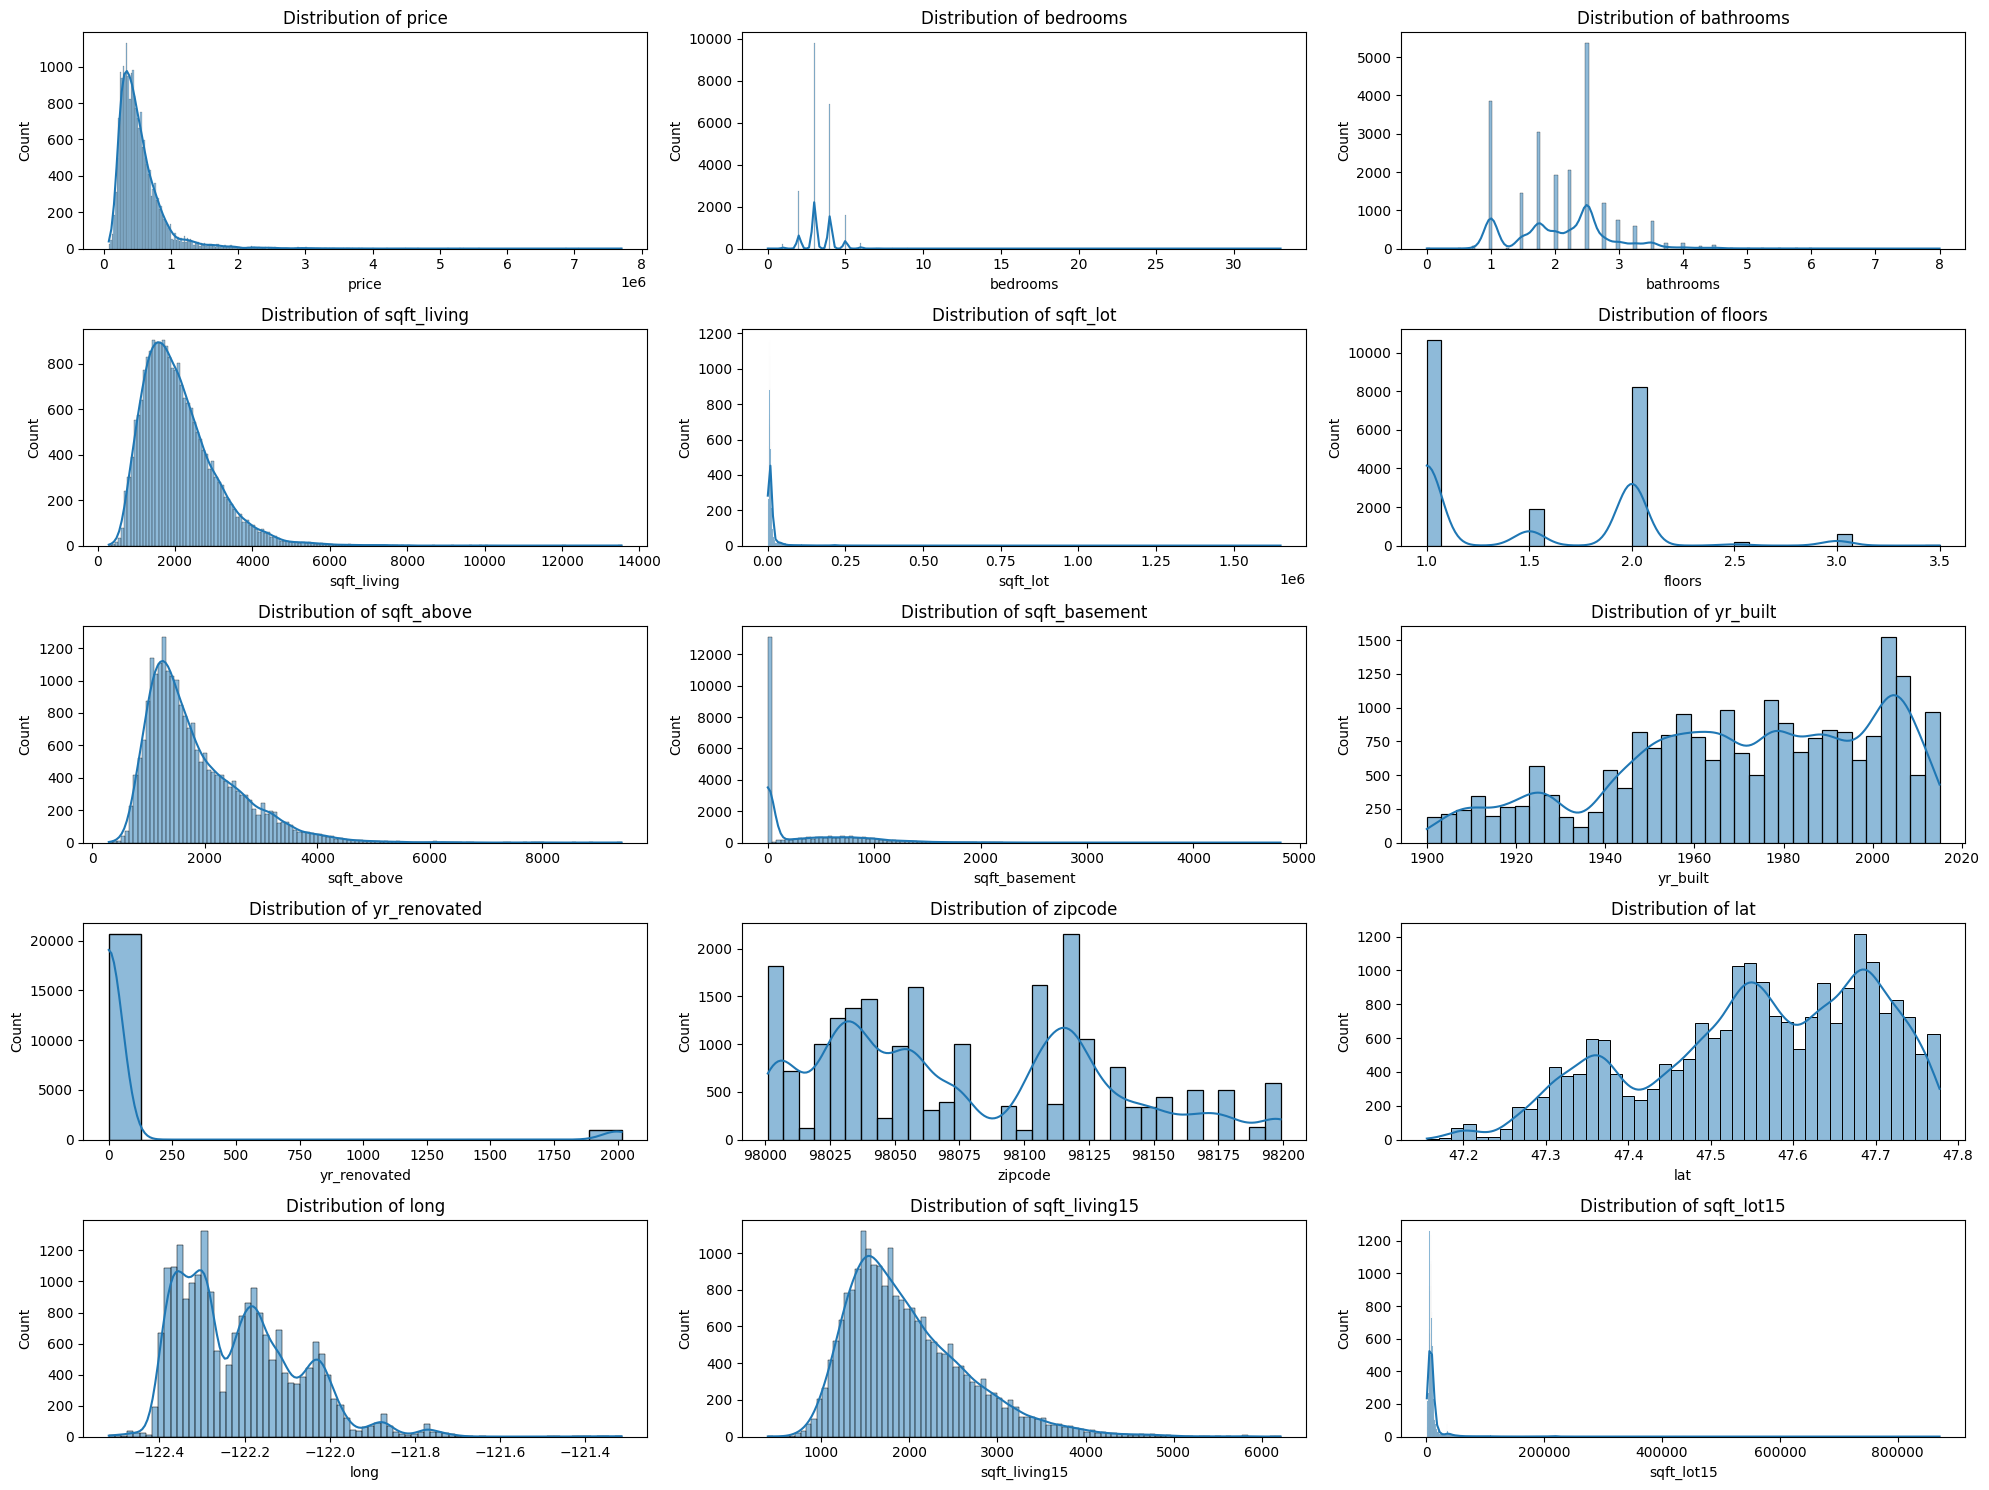

In [ ]:
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
def handle_outliers(df, column, cap=None):
    if cap:
        df[column] = np.where(df[column] > cap, cap, df[column])
    else:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = df[column].median()
        df[column] = np.where((df[column] < lower) | (df[column] > upper), median, df[column])
    return df


cap_lot = data['sqft_lot'].quantile(0.99)
data = handle_outliers(data, 'sqft_lot', cap=cap_lot)

cap_lot15 = data['sqft_lot15'].quantile(0.99)
data = handle_outliers(data, 'sqft_lot15', cap=cap_lot15)

data = handle_outliers(data, 'bedrooms', cap=8)



# # Cap sqft_lot at 99th percentile
# cap_lot = data['sqft_lot'].quantile(0.99)
# data['sqft_lot'] = data['sqft_lot'].clip(upper=cap_lot)

# # Cap sqft_lot15 at 99th percentile
# cap_lot15 = data['sqft_lot15'].quantile(0.99)
# data['sqft_lot15'] = data['sqft_lot15'].clip(upper=cap_lot15)

# # Cap bedrooms at 8 (manually decided)
# data['bedrooms'] = data['bedrooms'].clip(upper=8)

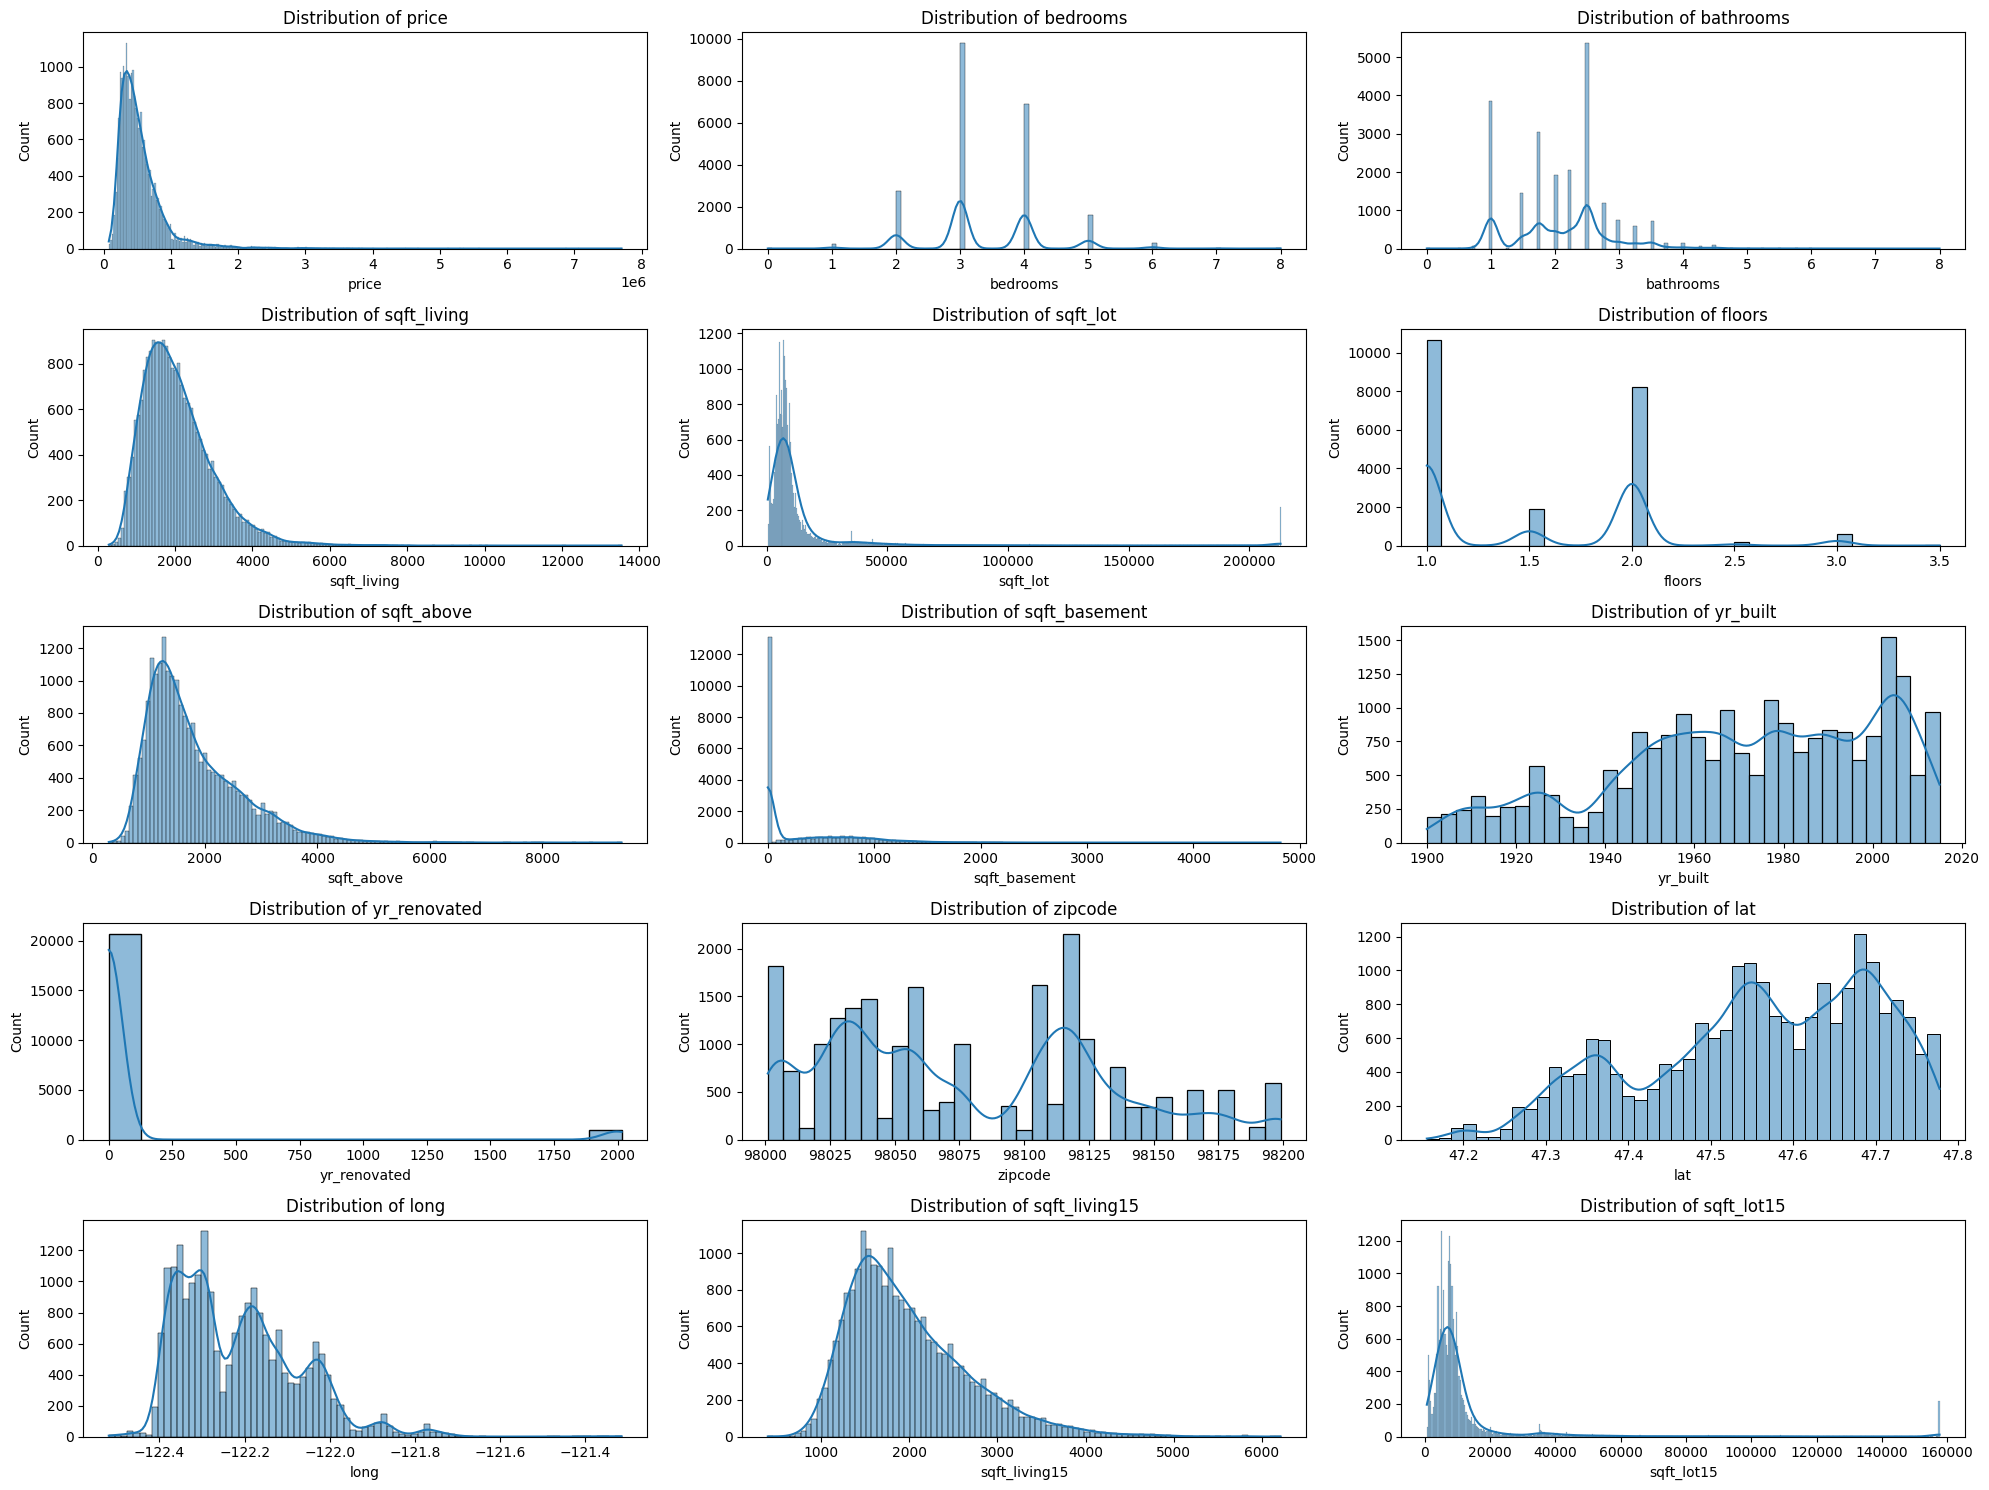

In [ ]:
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Year
data['yr_sold'] = pd.to_datetime(data['date']).dt.year

# House age
data['house_age'] = data['yr_sold'] - data['yr_built']

# Renovation flag
data['renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)

# Basement flag
data['has_basement'] = np.where(data['sqft_basement'] > 0, 1, 0)

# Location
kmeans = KMeans(n_clusters=20, random_state=42)
data['location_cluster'] = kmeans.fit_predict(data[['lat', 'long']])

# Drop redundancies
data = data.drop(['date', 'yr_sold', 'yr_built', 'yr_renovated', 'sqft_basement', 'lat', 'long', 'zipcode', 'sqft_above', 'sqft_lot15'], axis=1)

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,house_age,renovated,has_basement,location_cluster
0,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,7,1340,59,0,0,18
1,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,7,1690,63,1,1,10
2,180000.0,2,1.00,770,10000.0,1.0,0,0,3,6,2720,82,0,0,3
3,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,7,1360,49,0,1,14
4,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,1800,28,0,0,16


In [ ]:
numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                  'floors', 'sqft_living15', 'house_age']

categorical_columns = ['waterfront', 'view', 'condition', 'grade',
                    'renovated', 'has_basement', 'location_cluster']

In [ ]:
X = data.drop(columns=['price'], axis=1)
Y = data['price']

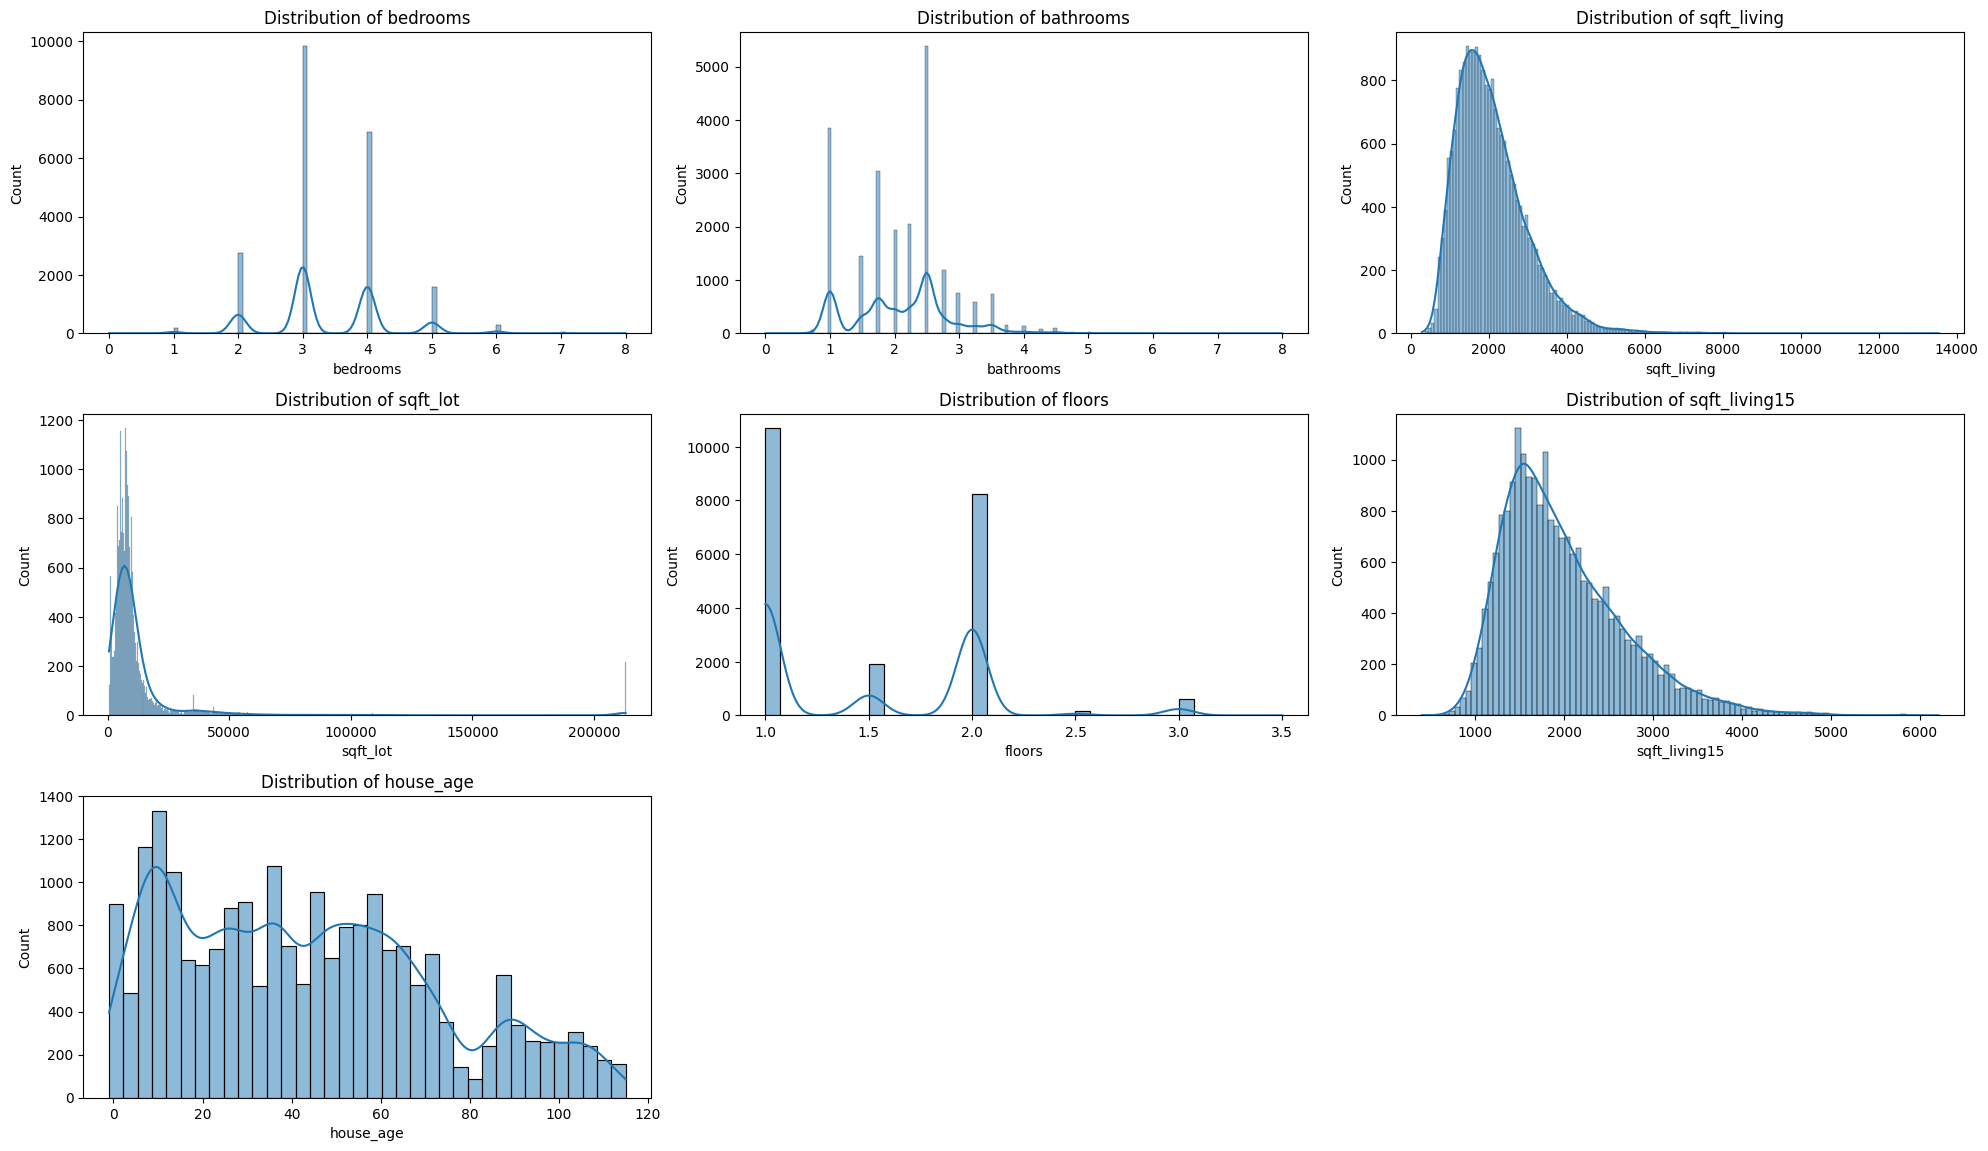

In [ ]:
plt.figure(figsize=(20,15))
for i, col in enumerate(X[numerical_columns], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

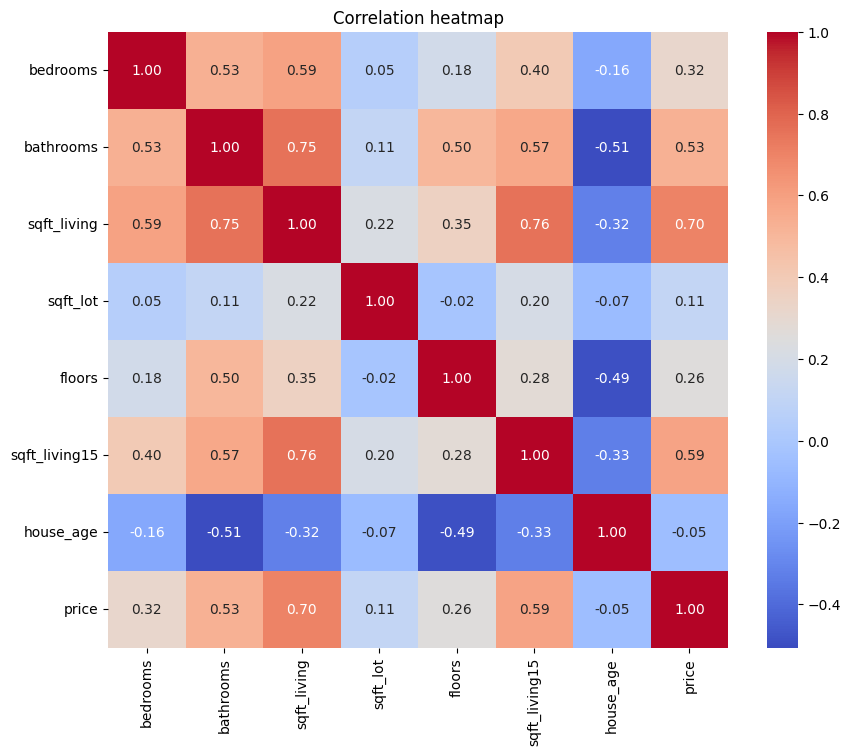

In [ ]:
data_for_corr = pd.concat([X[numerical_columns], Y], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(data_for_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [ ]:
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

waterfront: [0 1]
view: [0 3 4 2 1]
condition: [3 5 4 1 2]
grade: [ 7  6  8 11  9  5 10 12  4  3 13  1]
renovated: [0 1]
has_basement: [0 1]
location_cluster: [18 10  3 14 16  2  4  0  5  1  9 19 11 13 12 15  8  7 17  6]


In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

for col in X[categorical_columns]:
    ct = pd.crosstab(X[categorical_columns][col], Y)
    cv = cramers_v(ct)
    print(f"Cramér’s V ({col} vs left): {cv:.3f}")

Cramér’s V (waterfront vs left): 0.618
Cramér’s V (view vs left): 0.530
Cramér’s V (condition vs left): 0.456
Cramér’s V (grade vs left): 0.680
Cramér’s V (renovated vs left): 0.474
Cramér’s V (has_basement vs left): 0.477
Cramér’s V (location_cluster vs left): 0.459


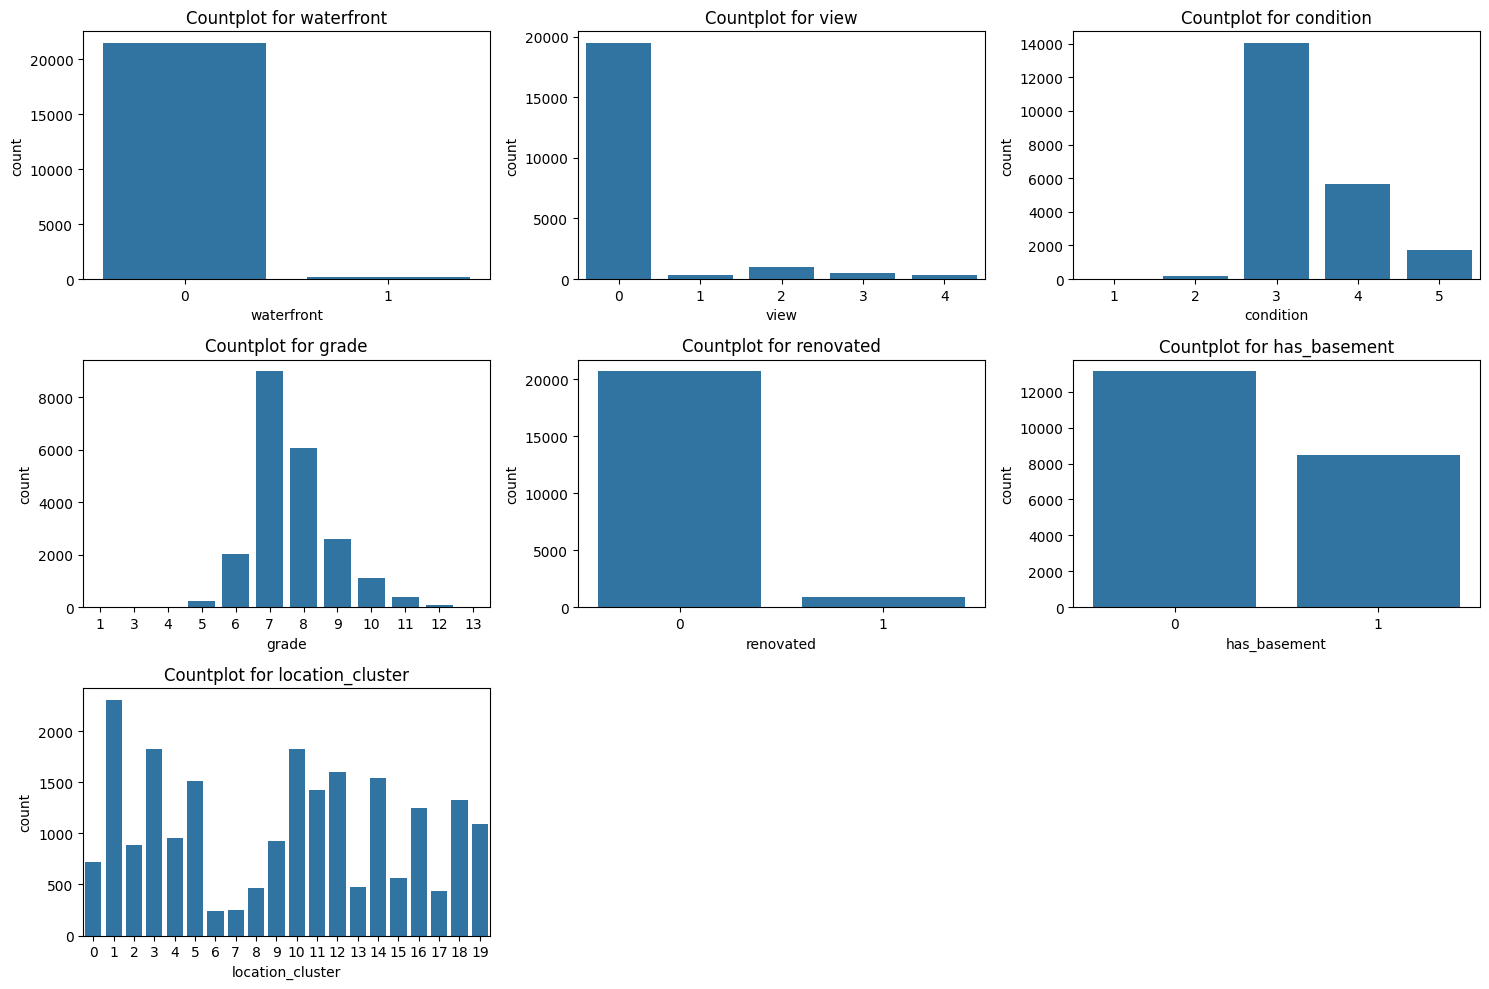

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(X[categorical_columns], 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=column, data=X[categorical_columns])
  plt.title(f"Countplot for {column}")

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()

X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical_scaled = scaler.transform(X_test[numerical_columns])

# Convert scaled numerical arrays back to DataFrames
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_columns, index=X_train.index)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_columns, index=X_test.index)

X_train_categorical = X_train.drop(columns=numerical_columns)
X_test_categorical = X_test.drop(columns=numerical_columns)

X_train = pd.concat([X_train_numerical_scaled_df, X_train_categorical], axis=1)
X_test = pd.concat([X_test_numerical_scaled_df, X_test_categorical], axis=1)

In [ ]:
department_train = X_train[['location_cluster']]
department_test = X_test[['location_cluster']]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_train = encoder.fit_transform(department_train)
encoded_test = encoder.transform(department_test)

# Convert the encoded arrays back to DataFrames with proper column names
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['location_cluster']), index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['location_cluster']), index=X_test.index)

X_train = X_train.drop(columns=['location_cluster'])
X_test = X_test.drop(columns=['location_cluster'])

X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

In [ ]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_living15,house_age,waterfront,view,condition,grade,renovated,has_basement,location_cluster_0,location_cluster_1,location_cluster_2,location_cluster_3,location_cluster_4,location_cluster_5,location_cluster_6,location_cluster_7,location_cluster_8,location_cluster_9,location_cluster_10,location_cluster_11,location_cluster_12,location_cluster_13,location_cluster_14,location_cluster_15,location_cluster_16,location_cluster_17,location_cluster_18,location_cluster_19
7291,-0.403622,-0.472433,0.127706,-0.249773,-0.913657,0.287368,0.597955,0,2,4,7,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14835,-0.403622,0.507536,0.326877,-0.256252,0.937642,-0.578250,-0.523712,0,0,3,9,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15880,-1.511690,-1.452402,-0.934540,-0.365077,-0.913657,-0.548907,1.447703,0,0,3,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8812,0.704447,0.180880,0.481788,-0.144456,-0.913657,1.651817,0.122096,0,0,4,9,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17220,-0.403622,-1.452402,-1.011996,-0.232948,-0.913657,-0.270148,1.821592,0,0,4,6,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
